수정일: 2020-12-07

###1. 정해야 할 것
- 이미지 사이즈, 배치 사이즈, epoch 등
- data augmentation 할 때 parameter들

###2. 데이터 관련 마무리 해야할 것
- train, test, val(?)로 데이터 나누기
- 이미지 비율 최대한 1:1인지 확인하고 조정하기
- 보건용 마스크와 덴탈마스크 폴더 합치기
- 확실한 데이터 전체 개수 (클래스별 개수, 총 개수) 확인하기

###3. 기본 코드 작성 완료 후 해볼 것
- 층 여러가지로 쌓아보기
- optimizer, loss function 여러가지 시도

In [ ]:
# zip 파일 압축 풀기
'''
import zipfile
with zipfile.ZipFile('/content/drive/Shared drives/2020 인공지능 심화과정 특강/dataset_split.zip', 'r') as zip_ref:
  zip_ref.extractall('/content/drive/Shared drives/2020 인공지능 심화과정 특강/dataset')
'''
%pwd

'/mnt/c/Users/iDen/Downloads'

In [ ]:
# 2. Dataset 불러오기

from tensorflow import keras

# training set
train_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1/255,
                                                             rotation_range=10,  
                                                             width_shift_range=0.1,  
                                                             horizontal_flip=True
                                                             ) # Data augmentation

train_generator = train_datagen.flow_from_directory(
    '/mnt/c/Users/iDen/Downloads/dataset_split/train', 
    target_size=(256,256), 
    batch_size=32, 
    class_mode='categorical'
) 

# test set
test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1/255)

test_generator = test_datagen.flow_from_directory(
    '/mnt/c/Users/iDen/Downloads/dataset_split/test', 
    target_size=(256,256), 
    batch_size=32, 
    class_mode='categorical'
) 

# validation set
val_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1/255)

val_generator = val_datagen.flow_from_directory(
    '/mnt/c/Users/iDen/Downloads/dataset_split/val', 
    target_size=(256,256), 
    batch_size=32, 
    class_mode='categorical'
) 

print(train_generator.image_shape)
print(train_generator.class_indices)

Found 1954 images belonging to 5 classes.
Found 555 images belonging to 5 classes.
Found 277 images belonging to 5 classes.
(256, 256, 3)
{'BlackFashionMask': 0, 'ChinMask': 1, 'CookingMask': 2, 'HealthMask': 3, 'NoMask': 4}


In [ ]:
# 3. data 살펴보기

print(train_generator[0][0].shape)

(32, 256, 256, 3)


In [ ]:
# 4. 모델 구성

from tensorflow import keras

model = keras.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=train_generator.image_shape))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(keras.layers.Dropout(0.2))


model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(5, activation='softmax'))

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_70 (Conv2D)           (None, 254, 254, 32)      896       
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 252, 252, 32)      9248      
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 126, 126, 32)      0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 126, 126, 32)      0         
_________________________________________________________________
conv2d_72 (Conv2D)           (None, 124, 124, 32)      9248      
_________________________________________________________________
conv2d_73 (Conv2D)           (None, 122, 122, 32)      9248      
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 61, 61, 32)       

In [ ]:
# 5. compile

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# 6. train
# from keras.callbacks import EarlyStopping

epochs = 100

es = keras.callbacks.EarlyStopping(monitor='val_acc', mode='max', verbose=1, patience=10)

history = model.fit(train_generator, 
                    steps_per_epoch=61, # 총 학습 이미지 개수 / 배치 사이즈 
                    epochs=epochs,
                    validation_data=val_generator,
                    validation_steps=8,
                    callbacks=[es]
)

Epoch 1/100
61/61 [==============================] - 135s 2s/step - loss: 1.3877 - acc: 0.3689 - val_loss: 1.2255 - val_acc: 0.4883
Epoch 2/100
61/61 [==============================] - 135s 2s/step - loss: 1.1733 - acc: 0.5239 - val_loss: 1.1658 - val_acc: 0.5117
Epoch 3/100
61/61 [==============================] - 133s 2s/step - loss: 1.0273 - acc: 0.5931 - val_loss: 1.0910 - val_acc: 0.5469
Epoch 4/100
61/61 [==============================] - 127s 2s/step - loss: 0.8197 - acc: 0.6863 - val_loss: 0.8345 - val_acc: 0.6406
Epoch 5/100
61/61 [==============================] - 125s 2s/step - loss: 0.7225 - acc: 0.7357 - val_loss: 0.8262 - val_acc: 0.6875
Epoch 6/100
61/61 [==============================] - 126s 2s/step - loss: 0.7066 - acc: 0.7408 - val_loss: 0.7677 - val_acc: 0.6719
Epoch 7/100
61/61 [==============================] - 127s 2s/step - loss: 0.7401 - acc: 0.7341 - val_loss: 0.6468 - val_acc: 0.7344
Epoch 8/100
61/61 [==============================] - 126s 2s/step - loss: 0.

In [ ]:
# 7. Evaluation

result = model.evaluate(test_generator)
print(result)

18/18 [==============================] - 6s 337ms/step - loss: 0.4033 - acc: 0.8505
[0.40328774932358, 0.85045046]


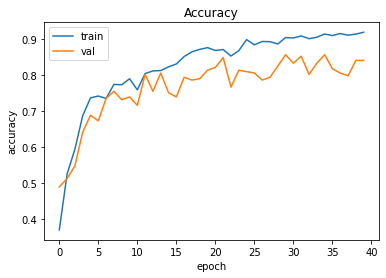

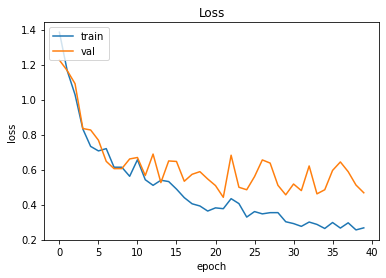

In [ ]:
# 8. 시각화

import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc = 'upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc = 'upper left')
plt.show()